In [1]:
# Import Required Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [5]:
# Read the Data

airlines = pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


#### EDA

In [6]:
# Renaming the Columns

airlines.rename({'ID#':'ID','Award?':'Award'}, axis=1, inplace=True)
airlines.head(3)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0


In [7]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
airlines.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
# Check for missing values

airlines.isna().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [10]:
# Check for Duplicated values

airlines[airlines.duplicated()]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award


In [14]:
airlines.drop(['ID'], axis=1, inplace=True)
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


### Hierarchical Clustering

In [15]:
import scipy.cluster.hierarchy as sch    
from sklearn.cluster import AgglomerativeClustering

In [16]:
# Normalization Function

def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    print(x)
    return x

In [17]:
airlines_norm = norm_func(airlines)

       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.

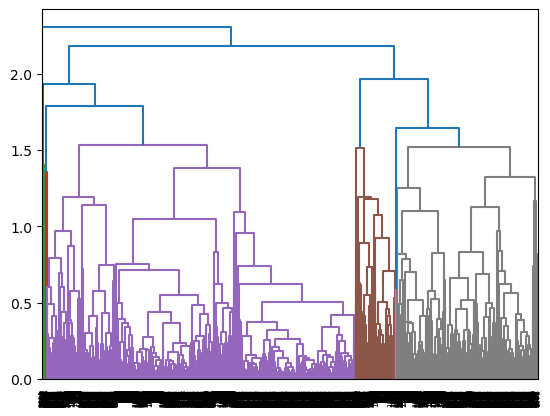

In [18]:
dendrogram = sch.dendrogram(sch.linkage(airlines_norm, method='complete'))

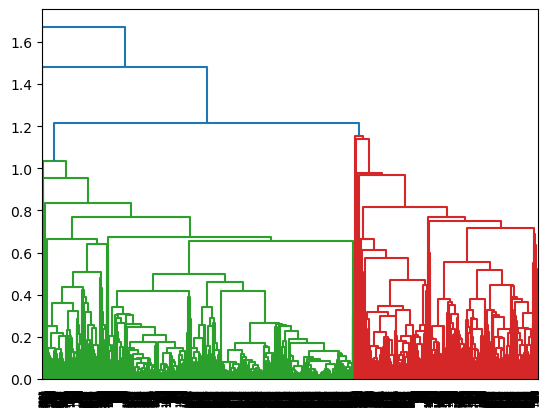

In [20]:
dendrogram = sch.dendrogram(sch.linkage(airlines_norm, method='average'))

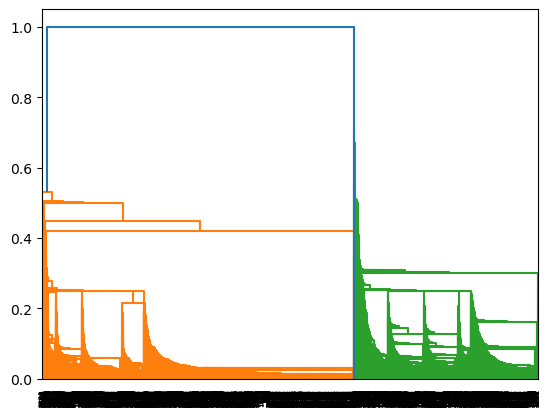

In [22]:
dendrogram = sch.dendrogram(sch.linkage(airlines_norm, method='single'))

In [23]:
# create clusters

hc = AgglomerativeClustering(n_clusters=3, metric = 'euclidean', linkage = 'complete',distance_threshold=None)

In [25]:
y_hc = hc.fit_predict(airlines_norm)

In [26]:
y_hc

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [27]:
set(y_hc)

{0, 1, 2}

In [28]:
airlines['h_clusterid'] = y_hc

In [29]:
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [30]:
airlines1 = airlines.sort_values("h_clusterid")
airlines1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
1999,327126,1452,5,1,1,97997,25,350,3,4440,1,0
3162,103203,0,1,1,1,3200,4,200,2,1556,1,0
3165,194816,0,1,1,1,20822,25,6647,12,2424,1,0
3167,17863,0,1,1,1,0,0,0,0,2028,1,0
1505,391222,0,3,1,1,27471,20,1600,7,4905,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1762,1703,0,1,1,1,1230,4,0,0,4390,0,2
1764,70518,0,1,1,1,2000,3,1000,2,4450,0,2
1768,99336,0,3,1,1,14195,14,500,1,4453,0,2
1770,38918,0,1,1,1,6505,29,618,2,4442,0,2


In [31]:
airlines.groupby("h_clusterid").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
h_clusterid,,,,,,,,,,,
0,97189.586113,239.728387,2.670524,1.007488,1.014295,28739.993193,15.588836,801.789653,2.449285,4628.761743,1.000000
1,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
2,59791.056611,88.188836,1.703484,1.018606,1.011085,10324.882423,9.192003,230.441013,0.672209,3824.887965,0.003167


In [33]:
from sklearn.metrics import silhouette_score
score =silhouette_score(airlines_norm, y_hc , metric='euclidean')
score

0.5318787367232326

### K-Means Clustering

In [34]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [35]:
airlinesK = pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
airlinesK.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [36]:
airlinesK.rename({'ID#':'ID','Award?':'Award'}, axis=1, inplace=True)
airlinesK.head(3)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0


In [37]:
airlinesK.drop(['ID'], axis=1, inplace=True)
airlinesK.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


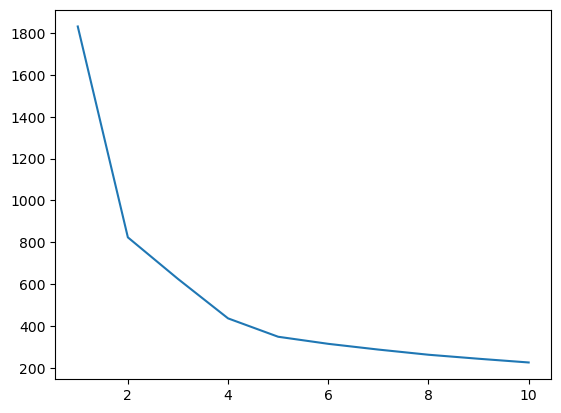

In [43]:
# Elbow Method

wcss=[]
for i in range(1,11):
    k_means=KMeans(n_clusters=i)
    k_means.fit(airlines_norm)
    wcss.append(k_means.inertia_) 
    
plt.plot(range(1,11),wcss)

In [45]:
#Build Cluster algorithm for 4 & 5 Clusters

# 4 Clusters

from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(airlines_norm)

silhouette_score(airlines_norm,clusters_new.labels_)

0.47483765255961

In [46]:
# 5 Clusters

from sklearn.cluster import KMeans
clusters_new1 = KMeans(5, random_state=42)
clusters_new1.fit(airlines_norm)

silhouette_score(airlines_norm,clusters_new1.labels_)

0.4430672072796034

In [47]:
# Let's continue with 4 Clusters

clusters_new.labels_

array([1, 1, 1, ..., 2, 1, 1])

In [48]:
set(clusters_new.labels_)

{0, 1, 2, 3}

In [49]:
airlinesK['clusterid_new'] = clusters_new.labels_
airlinesK

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [51]:
airlinesK.groupby('clusterid_new').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clusterid_new,,,,,,,,,,,
0,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
1,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0.0
2,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
3,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0.0


In [52]:
# Quality of clusters is expressed in terms of Silhoutte score

from sklearn.metrics import silhouette_score
score =silhouette_score(airlines_norm, clusters_new.labels_ , metric='euclidean')
score

0.47483765255961

### DBSCAN 

In [53]:
from sklearn.cluster import DBSCAN

In [55]:
airlinesdb = pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
airlinesdb.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [56]:
airlinesdb.rename({'ID#':'ID','Award?':'Award'}, axis=1, inplace=True)
airlinesdb.head(3)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0


In [57]:
airlinesdb.drop(['ID'], axis=1, inplace=True)
airlinesdb.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [58]:
airlines_val = airlinesdb.values

In [59]:
stscaler = StandardScaler()
X = stscaler.fit_transform(airlines_val)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

[[0.         0.11184685 0.12034246 ... 0.15881189 0.16026629 0.16537025]
 [0.         0.11406276 0.11437601 ... 0.1921006  0.21071895 0.21081947]
 [0.         0.16540223 0.19458949 ... 0.30691444 0.32157448 0.32480402]
 ...
 [0.         0.16614779 0.28024323 ... 0.77166854 0.78908622 0.82258359]
 [0.         0.25725534 0.27167409 ... 0.46521438 0.47071907 0.47345856]
 [0.         0.00270574 0.0112955  ... 0.06384821 0.08663803 0.09020918]]


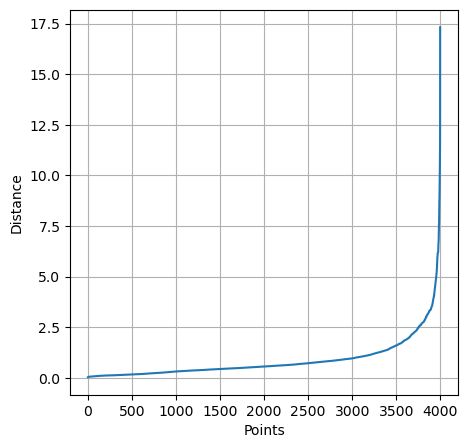

In [61]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)  # Atleast 5 is better
neighbors = nearest_neighbors.fit(X)

distances, indices = neighbors.kneighbors(X)  # For every point, what is neighbour distance

print(distances)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid()

1.595264521233641


<Figure size 500x500 with 0 Axes>

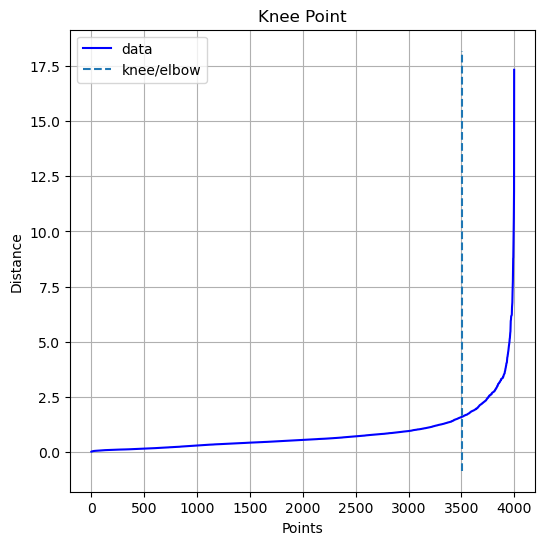

In [62]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid()

print(distances[knee.knee])

In [63]:
dbscan = DBSCAN(eps=2, min_samples=12)   # eps from knee point & samples = d+1 
clusters = dbscan.fit_predict(X)
set(clusters)

{-1, 0, 1, 2}

In [64]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [65]:
airlinesdb['cluster']=dbscan.labels_
airlinesdb.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [66]:
airlinesdb.groupby('cluster').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster,,,,,,,,,,,
-1,225687.589212,1491.705394,2.668050,1.174274,1.20332,47729.796680,25.423237,3311.946058,9.630705,4851.966805,0.742739
0,57585.495902,41.909016,1.695902,1.000000,1.00000,9775.423361,8.886475,187.600820,0.547951,3811.271311,0.000000
1,75887.015361,87.983871,2.641321,1.000000,1.00000,25391.933948,14.109063,445.843318,1.399386,4566.139785,1.000000
2,39218.500000,0.000000,1.000000,2.000000,1.00000,9189.250000,13.500000,209.375000,0.812500,3511.187500,0.000000


In [67]:
score =silhouette_score(X, dbscan.labels_ , metric='euclidean')
score

0.255303940580989